In [1]:
# General
import os, time
import requests, glob, warnings
import numpy as np
import pandas as pd
import datetime as dt
import tables as tb
pd.options.display.max_columns = 24

# Matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

# Cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader

# Other
import sys, importlib
sys.path.append('../src')
import learner
importlib.reload(learner)
#from learner import DeepLearner
#from keras import models

%config Completer.use_jedi = False

# Combine robustness test results

In [114]:
importlib.reload(learner)
l = learner.DeepLearner()

In [128]:
df = pd.DataFrame(columns=['mod_name', 'nx-ny-s', *['{}%'.format(i) for i in np.arange(5,51,5)]])
df

,mod_name,nx-ny-s,5%,10%,15%,20%,25%,30%,35%,40%,45%,50%


In [119]:
sks.shape

(10, 20, 4)

In [125]:
sks.std(axis=1).mean(axis=-1)

array([ 1.23058387, 10.25659511,  5.89807138,  9.35697798, 10.77376568,
        7.46533999, 11.11017457, 12.22735259,  9.96926711, 11.869616  ])

In [134]:
for experiment in ['shifted']:
    l.models_path = os.path.join(os.path.split(l.models_path)[0], experiment)
    print('\n Working on', experiment)
    for idx, mod_name in enumerate(os.listdir(l.models_path)):
        model_path = os.path.join(l.models_path, mod_name, mod_name + '.h5')
        if not os.path.exists(model_path) or 'ST_MDF_star' not in mod_name or 'nx12' in mod_name or 'nx16' in mod_name or 'nx20' in mod_name:
            continue
        print(mod_name)
        df.loc[idx, 'mod_name'] = 'ST-MDF*'
        nx = l._DeepLearner__get_attr(mod_name, 'n_x')
        ny = l._DeepLearner__get_attr(mod_name, 'n_y')
        s = l._DeepLearner__get_attr(mod_name, 'shift')
        df.loc[idx, 'nx-ny-s'] = '{}-{}-{}'.format(nx, ny, s)
        sks = np.load(os.path.join(l.models_path, mod_name, 'robustness-test/skill_per_horizon_taxi.npy'))
        sk = sks.mean(axis=1).mean(axis=-1).round(1)
        std = sks.std(axis=1).mean(axis=-1).round(1)
        df.loc[idx, '5%':] = ['{} ± {}'.format(s, st) for s, st in zip(sk, std)]
df.sort_values('nx-ny-s', inplace=True)
df


 Working on shifted
ST_MDF_star_nx08_ny08_sh08_RMSprop_mse_ep050
ST_MDF_star_nx04_ny08_sh04_Nadam_mse_ep050
ST_MDF_star_nx08_ny04_sh04_Nadam_mse_ep050
ST_MDF_star_nx08_ny08_sh04_Nadam_mse_ep050
ST_MDF_star_nx04_ny04_sh04_Nadam_mse_ep050


,mod_name,nx-ny-s,5%,10%,15%,20%,25%,30%,35%,40%,45%,50%
14,ST-MDF*,4-4-4,-5.0 ± 1.2,-11.7 ± 10.3,-7.5 ± 5.9,-15.3 ± 9.4,-15.6 ± 10.8,-15.1 ± 7.5,-22.2 ± 11.1,-25.3 ± 12.2,-24.5 ± 10.0,-26.3 ± 11.9
7,ST-MDF*,4-8-4,-3.5 ± 1.0,-3.5 ± 1.2,-6.3 ± 4.9,-6.9 ± 4.3,-9.4 ± 6.1,-9.8 ± 4.0,-13.5 ± 7.2,-12.7 ± 7.2,-13.6 ± 6.7,-14.7 ± 8.3
11,ST-MDF*,8-4-4,-5.7 ± 4.4,-5.6 ± 1.7,-11.7 ± 9.8,-13.8 ± 11.3,-14.5 ± 10.5,-20.3 ± 11.2,-17.5 ± 12.2,-23.7 ± 13.5,-21.9 ± 10.5,-29.2 ± 13.2
13,ST-MDF*,8-8-4,-5.3 ± 6.2,-5.3 ± 5.6,-5.5 ± 4.3,-8.3 ± 5.5,-8.3 ± 5.9,-11.6 ± 7.0,-12.8 ± 8.4,-13.3 ± 7.8,-15.9 ± 10.1,-15.6 ± 10.0
3,ST-MDF*,8-8-8,-5.2 ± 4.3,-5.8 ± 5.0,-9.7 ± 7.4,-10.3 ± 7.0,-10.8 ± 7.4,-8.7 ± 3.4,-14.8 ± 8.2,-12.9 ± 6.2,-17.5 ± 7.3,-16.7 ± 7.2


In [135]:
#df.iloc[:, [0,1,3,5,7,9,11]]
df.to_csv('./rob-taxi.csv')

In [146]:
df = pd.DataFrame(columns=['mod_name', 'nx-ny-s', *['{}%'.format(i) for i in np.arange(5,51,5)]])
df

,mod_name,nx-ny-s,5%,10%,15%,20%,25%,30%,35%,40%,45%,50%


In [147]:
for experiment in ['shifted']:
    l.models_path = os.path.join(os.path.split(l.models_path)[0], experiment)
    print('\n Working on', experiment)
    for idx, mod_name in enumerate(os.listdir(l.models_path)):
        model_path = os.path.join(l.models_path, mod_name, mod_name + '.h5')
        if not os.path.exists(model_path) or 'ST_MDF_star' not in mod_name or 'nx12' in mod_name or 'nx16' in mod_name or 'nx20' in mod_name:
            continue
        #print(model_path)
        df.loc[idx, 'mod_name'] = 'ST-MDF*'
        nx = l._DeepLearner__get_attr(mod_name, 'n_x')
        ny = l._DeepLearner__get_attr(mod_name, 'n_y')
        s = l._DeepLearner__get_attr(mod_name, 'shift')
        df.loc[idx, 'nx-ny-s'] = '{}-{}-{}'.format(nx, ny, s)
        sks = np.load(os.path.join(l.models_path, mod_name, 'robustness-test/skill_per_horizon_bike.npy'))
        sk = sks.mean(axis=1).mean(axis=-1).round(1)
        std = sks.std(axis=1).mean(axis=-1).round(1)
        df.loc[idx, '5%':] = ['{} ± {}'.format(s, st) for s, st in zip(sk, std)]
df.sort_values('nx-ny-s', inplace=True)
df


 Working on shifted


,mod_name,nx-ny-s,5%,10%,15%,20%,25%,30%,35%,40%,45%,50%
14,ST-MDF*,4-4-4,-0.9 ± 0.1,-1.3 ± 0.7,-1.0 ± 0.4,-1.6 ± 0.6,-1.6 ± 0.7,-1.6 ± 0.5,-2.1 ± 0.7,-2.2 ± 0.8,-2.2 ± 0.6,-2.2 ± 0.7
7,ST-MDF*,4-8-4,-0.7 ± 0.2,-0.7 ± 0.2,-0.9 ± 0.4,-0.9 ± 0.4,-1.1 ± 0.5,-1.2 ± 0.4,-1.5 ± 0.5,-1.4 ± 0.5,-1.4 ± 0.5,-1.5 ± 0.6
11,ST-MDF*,8-4-4,-0.8 ± 0.3,-0.8 ± 0.2,-1.1 ± 0.7,-1.3 ± 0.7,-1.3 ± 0.7,-1.6 ± 0.8,-1.5 ± 0.8,-1.9 ± 0.8,-1.6 ± 0.9,-2.2 ± 0.8
13,ST-MDF*,8-8-4,-0.6 ± 0.5,-0.5 ± 0.5,-0.4 ± 0.5,-0.7 ± 0.6,-0.7 ± 0.6,-0.9 ± 0.7,-1.1 ± 0.8,-1.2 ± 0.6,-1.2 ± 0.8,-1.4 ± 0.7
3,ST-MDF*,8-8-8,-0.1 ± 0.3,-0.1 ± 0.3,-0.4 ± 0.5,-0.4 ± 0.4,-0.4 ± 0.4,-0.2 ± 0.3,-0.6 ± 0.5,-0.5 ± 0.4,-0.7 ± 0.4,-0.5 ± 0.5


In [148]:
#df.iloc[:, [0,1,3,5,7,9,11]]
df.to_csv('./rob-bike.csv')

# Artículo

## Precision assesment

**Cómo mostrar el error/precisión:**
- Taxis - bicis
- RMSE - MAE - skill (persistence?)
- Separando por horizontes: $n_y$ = 4,8
- Reordernar filas agrupando por ($n_x, n_y, s$) iguales
- Sugerencia Dopico: comparación pre/post COVID

**Experimento 02:** Aumento en $n_x$.
- $n_y = 4, s = 4$
- $n_x$ = 4, 8, 12, 16, 20

In [76]:
importlib.reload(learner)
l = learner.DeepLearner()

In [77]:
l.n_y, l.shift = 4, 4

In [78]:
l.models_path

'../models/chicago/shifted'

In [79]:
l.models_path += '-from-limonero'

New version for thesis (adapt y-scale):

ST_MDF_star_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_star_nx08_ny04_sh04_Nadam_mse_ep050
ST_MDF_star_nx12_ny04_sh04_Nadam_mse_ep050
ST_MDF_star_nx16_ny04_sh04_Nadam_mse_ep050
ST_MDF_star_nx20_ny04_sh04_Nadam_mse_ep050


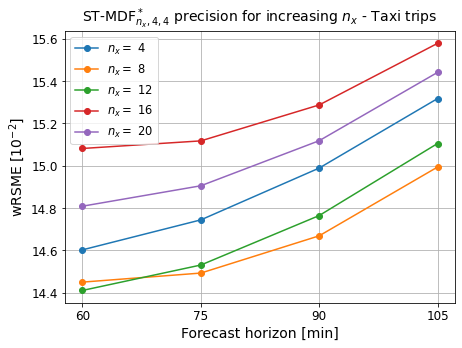

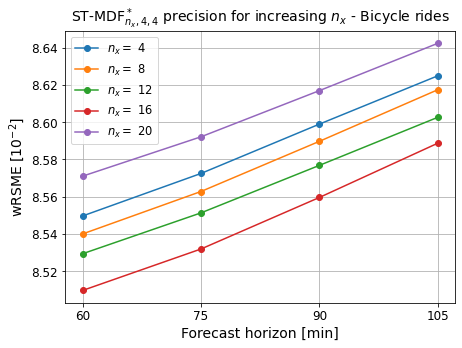

In [81]:
mod = 'ST_MDF_star_nx{:02}_ny04_sh04_Nadam_mse_ep050'
arr = np.empty((4, 5, 2))

fig, ax = plt.subplots()
#axs = axs.ravel()
fig.set_size_inches(7, 5)

for idx, nx in enumerate([4, 8, 12, 16, 20]):
    mod_name = mod.format(nx)
    l.n_x = nx
    print(mod_name)
    arr[:, idx, 0] = l._DeepLearner__get_attr(mod_name, 'rmse_w_count_taxi').mean(axis=-1)
    ax.plot(arr[:, idx, 0] * 10 ** 2, 'o-', label='$n_x =$ {}'.format(nx), linewidth=1.5)
ax.set_title('ST-MDF$^*_{n_x,4,4}$ precision for increasing $n_x$ - Taxi trips', fontsize=14)
ax.xaxis.set_major_locator(mticker.FixedLocator([0,1,2,3]))
ax.xaxis.set_ticklabels(['{}'.format((l.shift + i) * 15) for i in range(4)], fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Forecast horizon [min]', fontsize=14)
ax.set_ylabel('wRSME $[10^{-2}]$', fontsize=14)
ax.grid()
ax.legend(fontsize=11.5)
fig.savefig('exp02-taxi.pdf', bbox_inches='tight', pad_inches=0.015)
plt.show()

fig, ax = plt.subplots()
#axs = axs.ravel()
fig.set_size_inches(7, 5)
for idx, nx in enumerate([4, 8, 12, 16, 20]):
    mod_name = mod.format(nx)
    l.n_x = nx
    arr[:, idx, 1] = l._DeepLearner__get_attr(mod_name, 'rmse_w_count_bike').mean(axis=-1)
    ax.plot(arr[:, idx, 1] * 10 ** 2, 'o-', label='$n_x =$ {}'.format(nx), linewidth=1.5)
ax.set_title('ST-MDF$^*_{n_x,4,4}$ precision for increasing $n_x$ - Bicycle rides', fontsize=14)
ax.xaxis.set_major_locator(mticker.FixedLocator([0,1,2,3]))
ax.xaxis.set_ticklabels(['{}'.format((l.shift + i) * 15) for i in range(4)], fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Forecast horizon [min]', fontsize=14)
ax.set_ylabel('wRSME $[10^{-2}]$', fontsize=14)
ax.grid()
ax.legend(fontsize=11.5)
fig.savefig('exp02-bike.pdf', bbox_inches='tight', pad_inches=0.015)
plt.show()

Older version (before thesis):

ST_MDF_star_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_star_nx08_ny04_sh04_Nadam_mse_ep050
ST_MDF_star_nx12_ny04_sh04_Nadam_mse_ep050
ST_MDF_star_nx16_ny04_sh04_Nadam_mse_ep050
ST_MDF_star_nx20_ny04_sh04_Nadam_mse_ep050


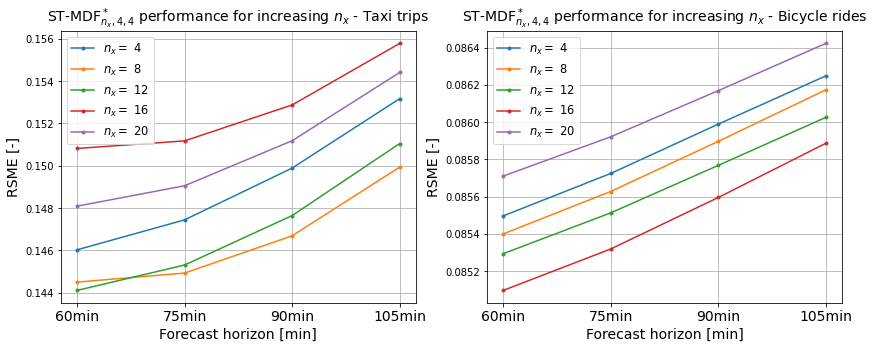

In [20]:
mod = 'ST_MDF_star_nx{:02}_ny04_sh04_Nadam_mse_ep050'
arr = np.empty((4, 5, 2))
fig, axs = plt.subplots(1,2)
axs = axs.ravel()
fig.set_size_inches(14, 5)

for idx, nx in enumerate([4, 8, 12, 16, 20]):
    mod_name = mod.format(nx)
    l.n_x = nx
    print(mod_name)
    arr[:, idx, 0] = l._DeepLearner__get_attr(mod_name, 'rmse_w_count_taxi').mean(axis=-1)
    arr[:, idx, 1] = l._DeepLearner__get_attr(mod_name, 'rmse_w_count_bike').mean(axis=-1)
    axs[0].plot(arr[:, idx, 0], '.-', label='$n_x =$ {}'.format(nx))
    axs[1].plot(arr[:, idx, 1], '.-', label='$n_x =$ {}'.format(nx))
axs[0].set_title('ST-MDF$^*_{n_x,4,4}$ performance for increasing $n_x$ - Taxi trips', fontsize=14)
axs[0].xaxis.set_major_locator(mticker.FixedLocator([0,1,2,3]))
axs[0].xaxis.set_ticklabels(['{}min'.format((l.shift + i) * 15) for i in range(4)], fontsize=14)
axs[0].set_xlabel('Forecast horizon [min]', fontsize=14)
axs[0].set_ylabel('RSME [-]', fontsize=14)
axs[0].grid()
axs[0].legend(fontsize=11.5)

axs[1].set_title('ST-MDF$^*_{n_x,4,4}$ performance for increasing $n_x$ - Bicycle rides', fontsize=14)
axs[1].xaxis.set_major_locator(mticker.FixedLocator([0,1,2,3]))
axs[1].xaxis.set_ticklabels(['{}min'.format((l.shift + i) * 15) for i in range(4)], fontsize=14)
axs[1].set_xlabel('Forecast horizon [min]', fontsize=14)
axs[1].set_ylabel('RSME [-]', fontsize=14)
axs[1].grid()
axs[1].legend(fontsize=11.5)
fig.savefig('exp02.pdf', bbox_inches='tight')
plt.show()

In [33]:
arr[:, 3, 0]

array([0.15081887, 0.15117731, 0.15287515, 0.15578415])

**Experimento 03:** ST-MDF vs ST-MDF$^w$ vs ST-MDF$^t$ vs ST-MDF*.

In [82]:
importlib.reload(learner)
l = learner.DeepLearner()

New version for thesis (adapt y-scale):

In [83]:
l.models_path = os.path.join(l.work_path, 'models', 'chicago', 'experiment03')

ST_MDF_star_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_w_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_t_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_nx04_ny04_sh04_Nadam_mse_ep050


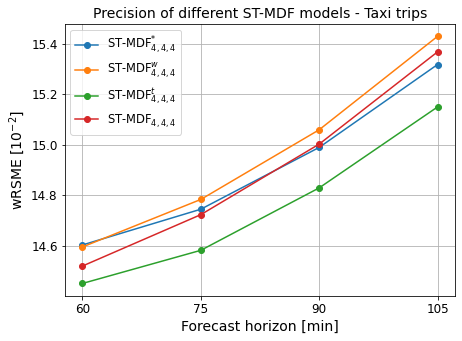

ST_MDF_star_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_w_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_t_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_nx04_ny04_sh04_Nadam_mse_ep050


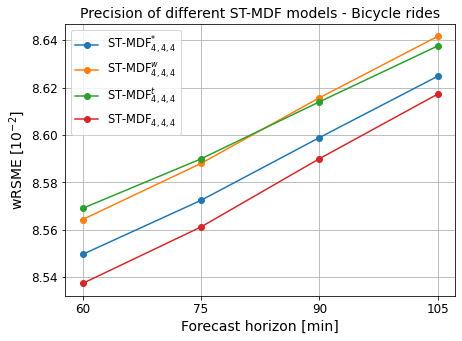

In [84]:
mod = 'ST_MDF{}_nx04_ny04_sh04_Nadam_mse_ep050'
arr = np.empty((4, 4, 2))
l.n_x, l.n_y, l.shift = 4, 4, 4

fig, ax = plt.subplots()
#axs = axs.ravel()
fig.set_size_inches(7, 5)
for idx, name in enumerate(['_star', '_w', '_t', '']): # '_w', '_t',
    mod_name = mod.format(name)
    print(mod_name)
    arr[:, idx, 0] = l._DeepLearner__get_attr(mod_name, 'rmse_w_count_taxi').mean(axis=-1)
    arr[:, idx, 1] = l._DeepLearner__get_attr(mod_name, 'rmse_w_count_bike').mean(axis=-1)
    name = name.replace('_', '').replace('star', '*')
    ax.plot(arr[:, idx, 0] * 10 ** 2, 'o-', label='ST-MDF$^{{{}}}_{{4,4,4}}$'.format(name), linewidth=1.5)
ax.set_title('Precision of different ST-MDF models - Taxi trips', fontsize=14)
ax.xaxis.set_major_locator(mticker.FixedLocator([0,1,2,3]))
ax.xaxis.set_ticklabels(['{}'.format((l.shift + i) * 15) for i in range(4)], fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Forecast horizon [min]', fontsize=14)
ax.set_ylabel('wRSME $[10^{-2}]$', fontsize=14)
ax.grid()
ax.legend(fontsize=11.5)
fig.savefig('exp03-taxi.pdf', bbox_inches='tight', pad_inches=0.015)
plt.show()

fig, ax = plt.subplots()
#axs = axs.ravel()
fig.set_size_inches(7, 5)
for idx, name in enumerate(['_star', '_w', '_t', '']): # '_w', '_t',
    mod_name = mod.format(name)
    print(mod_name)
    arr[:, idx, 0] = l._DeepLearner__get_attr(mod_name, 'rmse_w_count_taxi').mean(axis=-1)
    arr[:, idx, 1] = l._DeepLearner__get_attr(mod_name, 'rmse_w_count_bike').mean(axis=-1)
    name = name.replace('_', '').replace('star', '*')
    ax.plot(arr[:, idx, 1] * 10 ** 2, 'o-', label='ST-MDF$^{{{}}}_{{4,4,4}}$'.format(name), linewidth=1.5)
ax.set_title('Precision of different ST-MDF models - Bicycle rides', fontsize=14)
ax.xaxis.set_major_locator(mticker.FixedLocator([0,1,2,3]))
ax.xaxis.set_ticklabels(['{}'.format((l.shift + i) * 15) for i in range(4)], fontsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.set_xlabel('Forecast horizon [min]', fontsize=14)
ax.set_ylabel('wRSME $[10^{-2}]$', fontsize=14)
ax.grid()
ax.legend(fontsize=11.5)
fig.savefig('exp03-bike.pdf', bbox_inches='tight', pad_inches=0.015)
plt.show()

Older version (before thesis):

ST_MDF_star_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_w_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_t_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_nx04_ny04_sh04_Nadam_mse_ep050


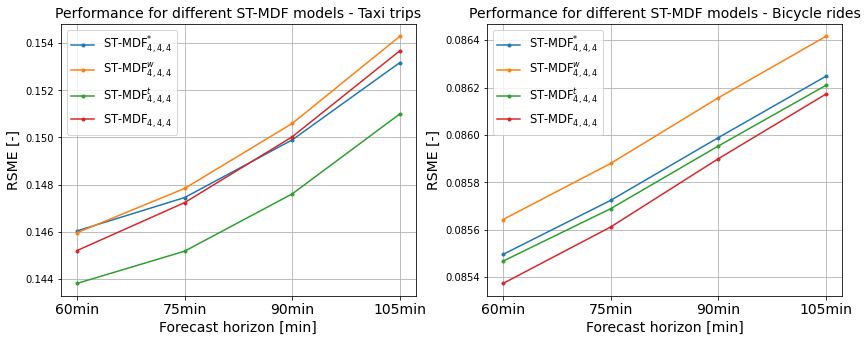

In [86]:
mod = 'ST_MDF{}_nx04_ny04_sh04_Nadam_mse_ep050'
arr = np.empty((4, 4, 2))
fig, axs = plt.subplots(1,2)
axs = axs.ravel()
fig.set_size_inches(14, 5)
l.n_x, l.n_y, l.shift = 4, 4, 4

for idx, name in enumerate(['_star', '_w', '_t', '']): # '_w', '_t',
    mod_name = mod.format(name)
    print(mod_name)
    arr[:, idx, 0] = l._DeepLearner__get_attr(mod_name, 'rmse_w_count_taxi').mean(axis=-1)
    arr[:, idx, 1] = l._DeepLearner__get_attr(mod_name, 'rmse_w_count_bike').mean(axis=-1)
    name = name.replace('_', '').replace('star', '*')
    axs[0].plot(arr[:, idx, 0], '.-', label='ST-MDF$^{{{}}}_{{4,4,4}}$'.format(name))
    axs[1].plot(arr[:, idx, 1], '.-', label='ST-MDF$^{{{}}}_{{4,4,4}}$'.format(name))
axs[0].set_title('Performance for different ST-MDF models - Taxi trips', fontsize=14)
axs[0].xaxis.set_major_locator(mticker.FixedLocator([0,1,2,3]))
axs[0].xaxis.set_ticklabels(['{}min'.format((l.shift + i) * 15) for i in range(4)], fontsize=14)
axs[0].set_xlabel('Forecast horizon [min]', fontsize=14)
axs[0].set_ylabel('RSME [-]', fontsize=14)
axs[0].grid()
axs[0].legend(fontsize=11.5)
axs[1].set_title('Performance for different ST-MDF models - Bicycle rides', fontsize=14)
axs[1].xaxis.set_major_locator(mticker.FixedLocator([0,1,2,3]))
axs[1].xaxis.set_ticklabels(['{}min'.format((l.shift + i) * 15) for i in range(4)], fontsize=14)
axs[1].set_xlabel('Forecast horizon [min]', fontsize=14)
axs[1].set_ylabel('RSME [-]', fontsize=14)
axs[1].grid()
axs[1].legend(fontsize=11.5)
fig.savefig('exp03.pdf', bbox_inches='tight')
plt.show()

In [83]:
l.models_path = os.path.join(l.work_path, 'models', 'chicago', 'experiment03')

ST_MDF_star_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_w_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_t_nx04_ny04_sh04_Nadam_mse_ep050
ST_MDF_nx04_ny04_sh04_Nadam_mse_ep050


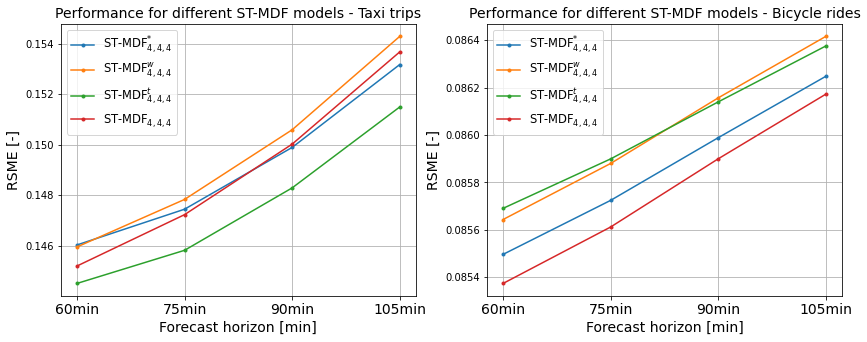

In [75]:
mod = 'ST_MDF{}_nx04_ny04_sh04_Nadam_mse_ep050'
arr = np.empty((4, 4, 2))
fig, axs = plt.subplots(1,2)
axs = axs.ravel()
fig.set_size_inches(14, 5)
l.n_x, l.n_y, l.shift = 4, 4, 4

for idx, name in enumerate(['_star', '_w', '_t', '']): # '_w', '_t',
    mod_name = mod.format(name)
    print(mod_name)
    arr[:, idx, 0] = l._DeepLearner__get_attr(mod_name, 'rmse_w_count_taxi').mean(axis=-1)
    arr[:, idx, 1] = l._DeepLearner__get_attr(mod_name, 'rmse_w_count_bike').mean(axis=-1)
    name = name.replace('_', '').replace('star', '*')
    axs[0].plot(arr[:, idx, 0], '.-', label='ST-MDF$^{{{}}}_{{4,4,4}}$'.format(name))
    axs[1].plot(arr[:, idx, 1], '.-', label='ST-MDF$^{{{}}}_{{4,4,4}}$'.format(name))
axs[0].set_title('Performance for different ST-MDF models - Taxi trips', fontsize=14)
axs[0].xaxis.set_major_locator(mticker.FixedLocator([0,1,2,3]))
axs[0].xaxis.set_ticklabels(['{}min'.format((l.shift + i) * 15) for i in range(4)], fontsize=14)
axs[0].set_xlabel('Forecast horizon [min]', fontsize=14)
axs[0].set_ylabel('RSME [-]', fontsize=14)
axs[0].grid()
axs[0].legend(fontsize=11.5)
axs[1].set_title('Performance for different ST-MDF models - Bicycle rides', fontsize=14)
axs[1].xaxis.set_major_locator(mticker.FixedLocator([0,1,2,3]))
axs[1].xaxis.set_ticklabels(['{}min'.format((l.shift + i) * 15) for i in range(4)], fontsize=14)
axs[1].set_xlabel('Forecast horizon [min]', fontsize=14)
axs[1].set_ylabel('RSME [-]', fontsize=14)
axs[1].grid()
axs[1].legend(fontsize=11.5)
fig.savefig('exp03.pdf', bbox_inches='tight')
plt.show()

In [43]:
arr.mean(axis=0).sum(axis=1)

array([0.23500089, 0.23569128, 0.2335543 , 0.2347964 ])

## Robustness assessment

**Robustez:**
- 20 repeticiones
- Gráficas para un modelo (taxis y bicis)
- Tabla comparando varios modelos: empeoramiento respecto al original, media de horizontes

In [87]:
importlib.reload(learner)
l = learner.DeepLearner()

In [111]:
l.n_x, l.n_y, l.shift = 8, 8, 4
mod_name = 'ST_MDF_star_nx{:02}_ny{:02}_sh{:02}_Nadam_mse_ep050'.format(l.n_x, l.n_y, l.shift)
arr_sks_taxi = np.load(os.path.join(l.models_path, mod_name, 'robustness-test/skill_per_horizon_taxi.npy'))
arr_sks_bike = np.load(os.path.join(l.models_path, mod_name, 'robustness-test/skill_per_horizon_bike.npy'))
rob_path = os.path.join(l.models_path, mod_name, 'robustness-test')

In [112]:
l._DeepLearner__plot_robustness(arr_sks_taxi[1::2], name='Taxi trips',
                                tickers=[int(i*100) for i in np.arange(0.1, 0.51, 0.1)],
                                plt_path=os.path.join(rob_path, mod_name + '_rob_test_taxi_reduced.pdf'))
l._DeepLearner__plot_robustness(arr_sks_bike[1::2], name='Bicycle rides',
                                tickers=[int(i*100) for i in np.arange(0.1, 0.51, 0.1)], 
                                plt_path=os.path.join(rob_path, mod_name + '_rob_test_bike_reduced.pdf'))


	Plot saved to ../models/chicago/shifted/ST_MDF_star_nx08_ny08_sh04_Nadam_mse_ep050/robustness-test/ST_MDF_star_nx08_ny08_sh04_Nadam_mse_ep050_rob_test_taxi_reduced.pdf

	Plot saved to ../models/chicago/shifted/ST_MDF_star_nx08_ny08_sh04_Nadam_mse_ep050/robustness-test/ST_MDF_star_nx08_ny08_sh04_Nadam_mse_ep050_rob_test_bike_reduced.pdf
